In [8]:
!pip install tensorflow==2.11.0

In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
print(tf.__version__)

2.11.0


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/nicknochnack/CommentToxicity/main/jigsaw-toxic-comment-classification-challenge/train.csv/train.csv')
df


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [5]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df.iloc[12]['comment_text']

'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...'

In [7]:
df[df.columns[2:]].iloc[12]

toxic            1
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 12, dtype: int64

In [8]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bi

In [9]:
from tensorflow import keras
from keras.layers import TextVectorization

In [10]:
x=df['comment_text']
y=df[df.columns[2:]].values

In [11]:
MAX_FEATURES = 200000 # number of words in the vocab

In [12]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [13]:
type(x)

pandas.core.series.Series

In [14]:
type(x.values)

numpy.ndarray

In [15]:
vectorizer.adapt(x.values)

In [16]:
vectorized_text = vectorizer(x.values)

In [17]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [18]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [19]:
batch_x, batch_y = dataset.as_numpy_iterator().next()

In [20]:
batch_x.shape

(16, 1800)

In [21]:
batch_y.shape

(16, 6)

In [22]:
int(len(dataset)*.7)

6981

In [23]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*1))

In [24]:
len(test)

998

In [25]:
!sudo pip3 install keras

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [26]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [27]:
y[0]

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
model = Sequential()
#Create the embedding layer
model.add(Embedding(MAX_FEATURES+1,32))
#Bidirectional LSTM layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
#Feature extractor fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
#Final layer
model.add(Dense(6, activation='sigmoid'))

In [29]:
model.compile(loss='BinaryCrossentropy',optimizer='Adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [31]:
history = model.fit(train, epochs = 1, validation_data = val)

6981/6981 [==============================] - 5369s 768ms/step - loss: 0.0624 - val_loss: 0.0464


In [32]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

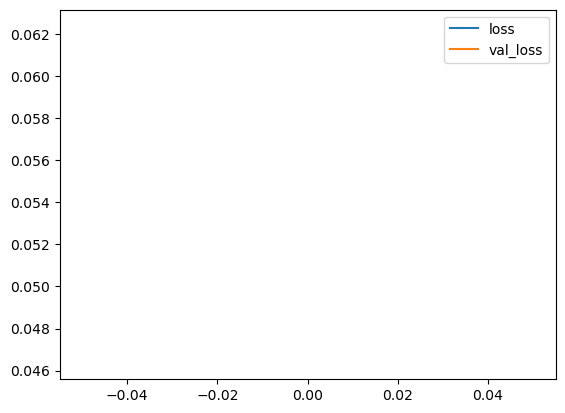

In [33]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [34]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [35]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [36]:
batch = test.as_numpy_iterator().next()

In [37]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [38]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 1s 1s/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [39]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 99ms/step


In [40]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [41]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [42]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 130ms/step


1/1 [==============================] - 0s 133ms/step


1/1 [==============================] - 0s 136ms/step


1/1 [==============================] - 0s 90ms/step


In [43]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision: 0.8039878606796265, Recall:0.6785510778427124,Accuracy:0.48597195744514465


In [44]:
!pip install gradio jinja2

     --------------------------------------- 15.8/15.8 MB 10.6 MB/s eta 0:00:00
     ---------------------------------------- 71.5/71.5 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 45.7/45.7 kB ? eta 0:00:00
     ------------------------------------- 202.8/202.8 kB 12.0 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 11.6 MB/s eta 0:00:00
     ---------------------------------------- 57.8/57.8 kB ? eta 0:00:00
     ---------------------------------------- 101.4/101.4 kB ? eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB ? eta 0:00:00
     ------------------------------------- 323.6/323.6 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 50.5/50.5 kB ? eta 0:00:00
     ------------------------------------- 813.6/813.6 kB 10.3 MB/s eta 0:00:00
     ------------------------------------- 199.8/199

In [45]:
import tensorflow as tf
import gradio as gr

In [46]:
model.save('toxicity.h5')

In [47]:
model = tf.keras.models.load_model('toxicity.h5')

In [48]:
input_str = vectorizer('hey i freaken hate you!')

In [49]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 718ms/step


In [50]:
res

array([[0.26417652, 0.01276225, 0.10596903, 0.02173745, 0.14073943,
        0.05257238]], dtype=float32)

In [52]:
df.columns[2:-1]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult'], dtype='object')

In [53]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [2]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

NameError: name 'gr' is not defined

In [1]:
interface.launch(share=True)

NameError: name 'interface' is not defined